In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
hospital_df = pd.read_csv("./HospitalAdmissionsData.csv")
hospital_df

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda
...,...,...,...,...,...,...,...,...,...,...
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis


In [4]:
#a. What are the column headers or features in this data set?
hospital_df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [5]:
#b. How many features are floats? How many are integers?
hospital_datatypes = hospital_df.dtypes
int_count = 0
float_count = 0
print(hospital_datatypes)
for types in hospital_datatypes:
    if (types == np.int64):
        int_count += 1
    if (types == np.float64):
        float_count += 1
print("Integers: " + str(int_count))
print("Floats: " + str(float_count))

ID                       int64
AdmissionLengthDays    float64
Death_1                  int64
Admission_Type          object
Insurance_Type          object
EnglishLanguage_1        int64
Religion_Type           object
Married_1                int64
Race                    object
Dx                      object
dtype: object
Integers: 4
Floats: 1


In [6]:
#c. Which features are objects (non-numeric variables)?
hospital_datatypes[hospital_datatypes == np.object]

Admission_Type    object
Insurance_Type    object
Religion_Type     object
Race              object
Dx                object
dtype: object

In [7]:
#d. What are the possible 'values' for insurance type?
hospital_df["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [8]:
#e. Show the summary statistics for the admission length.
hospital_df["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [9]:
#f. What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
print("Admission Type: " + str(hospital_df["Admission_Type"].mode()[0]))
print("Insurance Type: " + str(hospital_df["Insurance_Type"].mode()[0]))
print("Religion Type: " + str(hospital_df["Religion_Type"].mode()[0]))
print("Race: " + str(hospital_df["Race"].mode()[0]))
print("Diagnosis: " + str(hospital_df["Dx"].mode()[0]))


Admission Type: emergency
Insurance Type: medicare
Religion Type: catholic
Race: white
Diagnosis: newborn


The highest frequency of admission length days are between 0 and 50 days


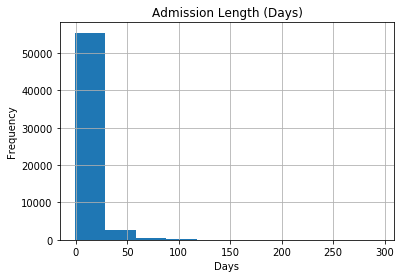

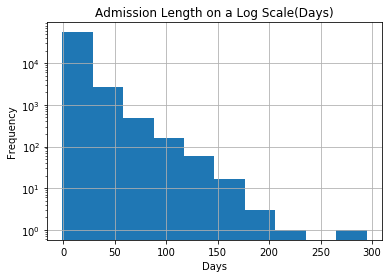

In [10]:
#g. Show a histogram for admission days (with appropriate labels, titles, etc), 
#and also show a histogram for admission days on a log scale. Describe what you see.

#Histogram
admission_hist = hospital_df.hist('AdmissionLengthDays')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title("Admission Length (Days)")

#Log Histogram
admission_log = hospital_df.hist('AdmissionLengthDays', log = True)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title("Admission Length on a Log Scale(Days)")

#Describe what you see.
print("The highest frequency of admission length days are between 0 and 50 days")

In [11]:
#h. Compare the average length of admission between those who died versus those who did not die. 
z = hospital_df.groupby("Death_1")["AdmissionLengthDays"]
print(z.mean())

Death_1
0    10.140012
1    10.129606
Name: AdmissionLengthDays, dtype: float64


C:\Users\antho\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


Text(0.5, 1.0, 'Admission Days compared with 0 and 1 Deaths')

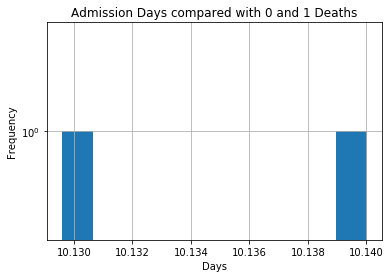

In [12]:
# Show a visualization, with appropriate labels, titles, etc.
z.mean().hist(log = True)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Admission Days compared with 0 and 1 Deaths')

In [ ]:
#i. Describe the association between death and insurance type and show a visualization or test.

assocation = hospital_df.groupby("Death_1")["Insurance_Type"]
assocation.hist(log = True)
#plt.legend({"Not Dead", "Dead"})
plt.xlabel("Insurance Type")
plt.ylabel("Frequency")
plt.title("Death and Insurance Type Association")


In [ ]:
#Recreating the Figure
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']
plt.subplot(3,1,1)
plt.plot(x,y1)
plt.title(names[0])
plt.subplot(3,1,2)
plt.plot(x,y2)
plt.title(names[1])
plt.subplot(3,1,3)
plt.plot(x,y3)
plt.title(names[2])
plt.tight_layout()